In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-w4jt5qmn
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-w4jt5qmn
ERROR: Operation cancelled by user


In [0]:
import statsmodels.api as sm

In [0]:

# https://ucla.box.com/s/24oxnhsoj6kpxhl6gyvuck25i3s4426d

!pip install PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json


In [0]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]
with open('./ECE219_tweet_data/tweets_#patriots.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)

f.closed

True

In [0]:
import numpy as np
import pytz
from datetime import timedelta
pst_tz = pytz.timezone('America/Los_Angeles')
print(datetime.datetime.fromtimestamp(tweet_time[0]))
print(datetime.datetime.fromtimestamp(tweet_time[1]))
print(datetime.datetime.fromtimestamp(tweet_time[2]))
print(datetime.datetime.fromtimestamp(tweet_time[3]))
print(datetime.datetime.fromtimestamp(tweet_time[4]))
print(len(follow_count))
# print(Total_tweet)
# mydate= datetime.datetime.fromtimestamp(datetime_object)
# print(mydate)
# print(mydate.hour)
print(tweet_time[0])
print(datetime.datetime.fromtimestamp(1420835445))
print(datetime.datetime.fromtimestamp(1420835444))
# print(tweet_time)
sortTime= np.sort(tweet_time, axis=0)
print(sortTime[0])
print(sortTime[-1])
print(datetime.datetime.fromtimestamp(sortTime[0]))
print(datetime.datetime.fromtimestamp(sortTime[-1]))

mint=datetime.datetime.fromtimestamp(sortTime[0],pst_tz)
maxt=datetime.datetime.fromtimestamp(sortTime[-1],pst_tz)
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)



2015-01-14 15:23:24
2015-01-16 02:06:11
2015-01-17 17:59:06
2015-01-17 00:43:47
2015-01-15 14:41:24
440621
1421249004
2015-01-09 20:30:45
2015-01-09 20:30:44
1421222838
1423335300
2015-01-14 08:07:18
2015-02-07 18:55:00
True range in hour:  586.795
Average number of tweets per hour 750.89426460689


In [0]:
import time

hour_bins= np.zeros(len(tweet_time))
hist_bins=[]
for element in sortTime:
  element_conv= datetime.datetime.fromtimestamp(element)
  bin_index=(element_conv-datetime.datetime.fromtimestamp(sortTime[0])).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  hist_bins.append(int(bin_index))

# print(hist_bins)    
#   hour_bins[bin]
#   time.sleep(5)

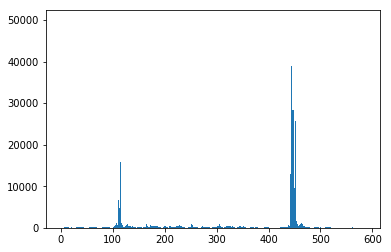

In [0]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(hist_bins, bins=int(timerange.total_seconds()/(60*60)))
plt.show()

In [0]:
np.mean(follow_count)

3280.4635616550277

In [0]:
np.mean(retweet_count)

1.7852871288476946

In [0]:
import pytz
from datetime import timedelta
pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
# print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append(int(bin_index))
  
  
# print(np.max(tweet_window))
# print((tweet_window))

In [0]:
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break
print(i)

586


In [0]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]
for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    for indexlayer in innerelement:
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
      


n_tweet= np.histogram(tweet_window,bins=int(np.max(tweet_window))+1)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', '# of retweets', 'Sum n followers', 'Max followers', 'Time of day'])

587
587
587
587
587


In [0]:
display(df.head()) 

,# of Tweets,# of retweets,Sum n followers,Max followers,Time of day
0,19,184,100154.0,41818.0,0
1,18,563,68802.0,19558.0,1
2,29,90,121673.0,38995.0,2
3,21,104,57049.0,19558.0,3
4,42,201,270091.0,65150.0,4


In [0]:

from sklearn.model_selection import train_test_split
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)


model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          1.91e-136
Time:                        20:09:30   Log-Likelihood:                -5361.4
No. Observations:                 586   AIC:                         1.073e+04
Df Residuals:                     580   BIC:                         1.076e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.1751    183.925      0.980      0.3

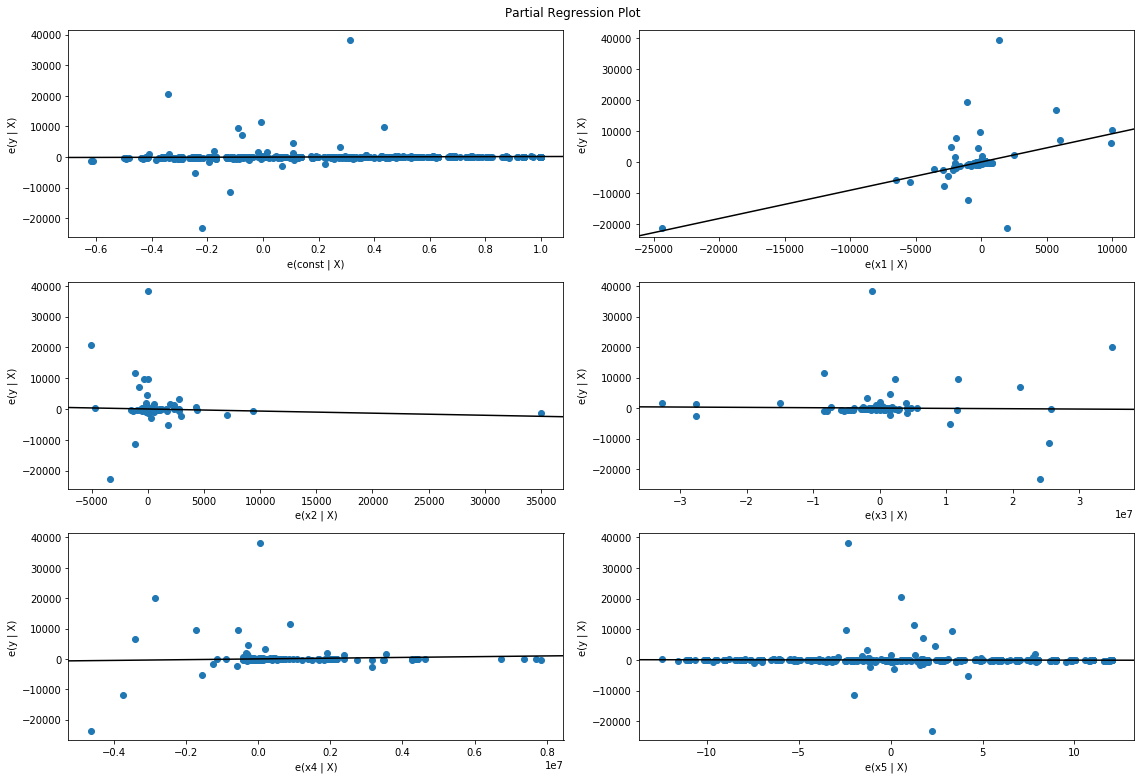

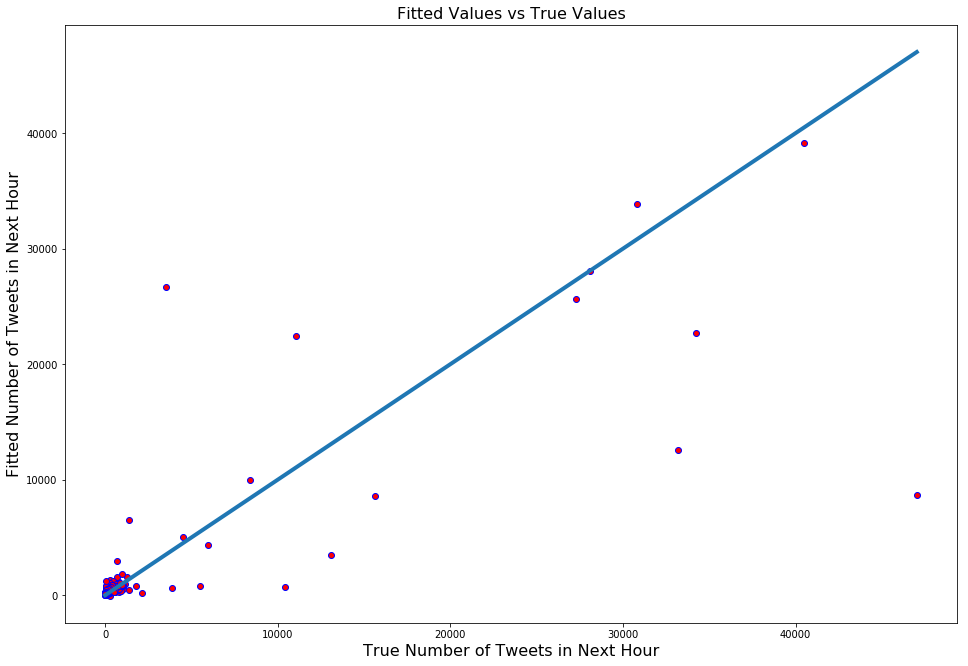

In [0]:

fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(16,11))
plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
plt.title('Fitted Values vs True Values', fontsize = 16)
plt.show()